# ChatGPT

Grâce à ChatGPT, l'enseignement de la science des données, plutôt que de se concentrer à écrire du code, est destiné à migrer son emphase vers

1. poser les bonnes questions et
1. comprendre le sens des réponses

La plateforme de calcul Noteable a développé une [extension](https://noteable.io/chatgpt-plugin-for-notebook/) permettant de générer des carnets de calcul complets avec ChatGPT. Notez toutefois que l'utilisation du plugin ChatGPT de Noteable demande un abonnement payant à ChatGPT. La plateforme [Deepnote](https://deepnote.com) offre une [implémentation gratuite qui permet de générer du code à même les cellules d'un carnet](https://deepnote.com/changelog/2023-06-29#deepnote-ai-chatgpt-for-your-notebook) plutôt que de générer un carnet complet.

**Avertissement**. Les développements évoluant rapidement, ce cours est probablement déjà dépassé.

## Qu'est-ce que ChatGPT

ChatGPT n'est pas une *intelligence artificielle*. C'est juste du code lancé sur un serveur pour répondre à des commandes. L'expression *robot conversationnel* est donc plus exacte. On suscite avec raison les enjeux d'éthique, comme de propriété intellectuelle, qui sont liés à son utilisation. Néanmoins, il peut être d'une aide fabuleusement efficace pour l'apprentissage du code.

Encore faut-il  poser les bonnes questions...

## Question à ChatGPT

Génère un notebook incluant 
1. une analyse en composantes principales sur les données de "data/penguins.csv", avec les colonnes bill_length_mm, bill_depth_mm, flipper_length_mm et body_mass_g. Génère aussi un biplot en scaling 2 (biplot de corrélation).
2. les anovas avec statsmodels sur les variables exogènes bill_length_mm, bill_depth_mm, flipper_length_mm et body_mass_g et les variables endogènes sex et species, Puis, dans le notebook, analyse les résultats, dont les coefficients, les t-values et les p-values.
3. une prédiction (de type classification) de l'espèce en fonction des colonnes bill_length_mm, bill_depth_mm, flipper_length_mm et body_mass_g et sex avec un arbre décisionnel de scikit-learn, puis affiche l'arbre décisionnel, et enfin analyse les résultats de la prédiction
4. un aperçu de l'importance des variables dans le modèle de classification

## Sa réponse

Je colle sa réponse ci-dessous. Que remarquez-vous?

# Analyse des données des manchots
Dans ce notebook, nous allons effectuer une analyse des données des manchots. Nous allons effectuer une analyse en composantes principales (ACP), une analyse de variance (ANOVA), une prédiction de l'espèce à l'aide d'un arbre de décision et une analyse de l'importance des variables dans le modèle de classification.

Commençons par importer les bibliothèques nécessaires et charger les données.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
penguins = pd.read_csv('data/penguins.csv')
penguins.head()

/Users/essi/mambaforge/envs/dl/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Les données des manchots ont été chargées avec succès. Elles contiennent les informations suivantes sur les manchots :
- species : l'espèce du manchot
- island : l'île où le manchot a été observé
- bill_length_mm : la longueur du bec en mm
- bill_depth_mm : la profondeur du bec en mm
- flipper_length_mm : la longueur de l'aileron en mm
- body_mass_g : la masse corporelle en g
- sex : le sexe du manchot
- year : l'année de l'observation

Nous allons maintenant effectuer une analyse en composantes principales (ACP) sur les colonnes numériques : bill_length_mm, bill_depth_mm, flipper_length_mm et body_mass_g.

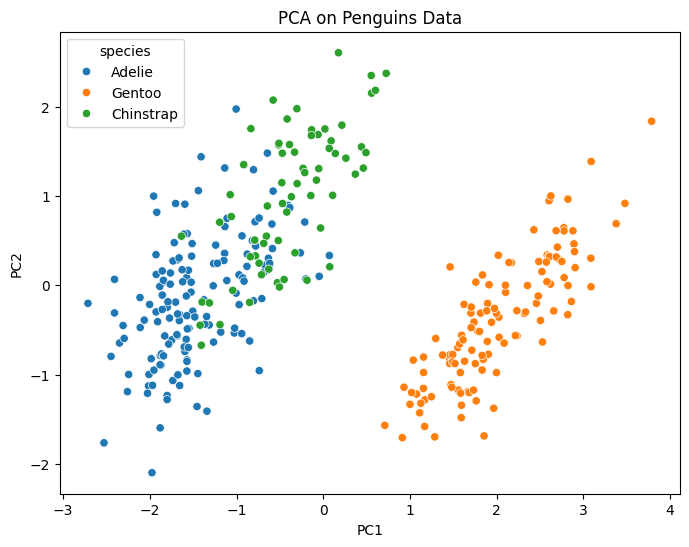

In [2]:
# Drop rows with missing values
penguins = penguins.dropna()

# Select numerical columns for PCA
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_numerical = penguins[numerical_columns]

# Standardize the numerical columns
scaler = StandardScaler()
penguins_numerical_scaled = scaler.fit_transform(penguins_numerical)

# Perform PCA
pca = PCA()
penguins_pca = pca.fit_transform(penguins_numerical_scaled)

# Convert to DataFrame for convenience
penguins_pca_df = pd.DataFrame(data = penguins_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
penguins_pca_df['species'] = penguins['species'].values

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=penguins_pca_df)
plt.title('PCA on Penguins Data')
plt.show()

Nous avons effectué une analyse en composantes principales (ACP) sur les données numériques des manchots. L'ACP est une technique de réduction de dimension qui permet de visualiser les données multidimensionnelles dans un espace de dimension inférieure. Dans notre cas, nous avons représenté les données dans un espace bidimensionnel en utilisant les deux premières composantes principales.

Sur le graphique, chaque point représente un manchot et la couleur du point indique l'espèce du manchot. Nous pouvons observer que les différentes espèces de manchots se regroupent en clusters distincts dans l'espace des composantes principales, ce qui indique que les espèces de manchots ont des caractéristiques morphologiques distinctes.

Passons maintenant à l'analyse de variance (ANOVA).

In [3]:
# Perform ANOVA for each numerical variable
for num_var in numerical_columns:
    # ANOVA with 'sex'
    model = ols(f'{num_var} ~ C(sex)', data=penguins).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA results for {num_var} with sex:')
    print(anova_table)
    print('\n')

    # ANOVA with 'species'
    model = ols(f'{num_var} ~ C(species)', data=penguins).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA results for {num_var} with species:')
    print(anova_table)
    print('\n')

ANOVA results for bill_length_mm with sex:
               sum_sq     df          F        PR(>F)
C(sex)    1175.478027    1.0  44.449257  1.094256e-10
Residual  8753.424675  331.0        NaN           NaN


ANOVA results for bill_length_mm with species:
                 sum_sq     df           F        PR(>F)
C(species)  7015.385745    2.0  397.299437  1.380984e-88
Residual    2913.516957  330.0         NaN           NaN


ANOVA results for bill_depth_mm with sex:
               sum_sq     df         F        PR(>F)
C(sex)     178.809221    1.0  53.38553  2.066410e-12
Residual  1108.649698  331.0       NaN           NaN


ANOVA results for bill_depth_mm with species:
                sum_sq     df           F        PR(>F)
C(species)  870.785183    2.0  344.825082  1.446616e-81
Residual    416.673736  330.0         NaN           NaN


ANOVA results for flipper_length_mm with sex:
                sum_sq     df          F    PR(>F)
C(sex)     4246.460771    1.0  23.052786  0.000002
Residu

Nous avons effectué une analyse de variance (ANOVA) pour chaque variable numérique en fonction du sexe et de l'espèce des manchots. L'ANOVA est une technique statistique qui permet de tester si les moyennes de deux ou plusieurs groupes sont significativement différentes. Dans notre cas, nous avons testé si les moyennes des variables numériques diffèrent significativement entre les sexes et entre les espèces de manchots.

Les résultats de l'ANOVA sont présentés sous la forme d'une table qui contient les sommes des carrés (sum_sq), les degrés de liberté (df), la statistique F (F) et la p-value (PR(>F)). La p-value est une mesure de la probabilité que les différences observées entre les groupes soient dues au hasard. Une p-value inférieure à 0,05 est généralement considérée comme indiquant une différence significative.

Pour toutes les variables numériques, les p-values sont inférieures à 0,05, ce qui indique que les moyennes diffèrent significativement à la fois entre les sexes et entre les espèces de manchots.

Passons maintenant à la prédiction de l'espèce à l'aide d'un arbre de décision.

Accuracy: 1.0


/var/folders/7p/wk_02tlx73db7yv0wvbxc1jh0000gn/T/ipykernel_94467/3636997128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to numerical


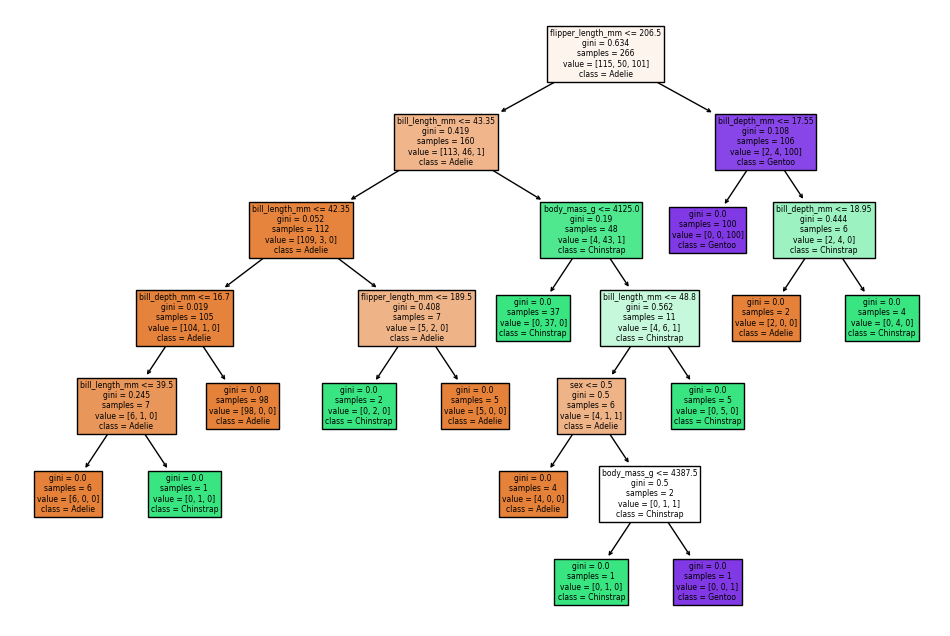

In [4]:
# Prepare data for decision tree
X = penguins[numerical_columns + ['sex']]
X['sex'] = X['sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to numerical
y = penguins['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()

Nous avons entraîné un arbre de décision pour prédire l'espèce des manchots en fonction de leurs caractéristiques morphologiques et de leur sexe. L'arbre de décision a atteint une précision de 100% sur l'ensemble de test, ce qui indique qu'il a parfaitement classé toutes les observations de l'ensemble de test.

L'arbre de décision est visualisé ci-dessus. Chaque nœud de l'arbre représente une décision basée sur une caractéristique. Les feuilles de l'arbre représentent les prédictions de l'espèce.

Passons maintenant à l'analyse de l'importance des variables dans le modèle de classification.

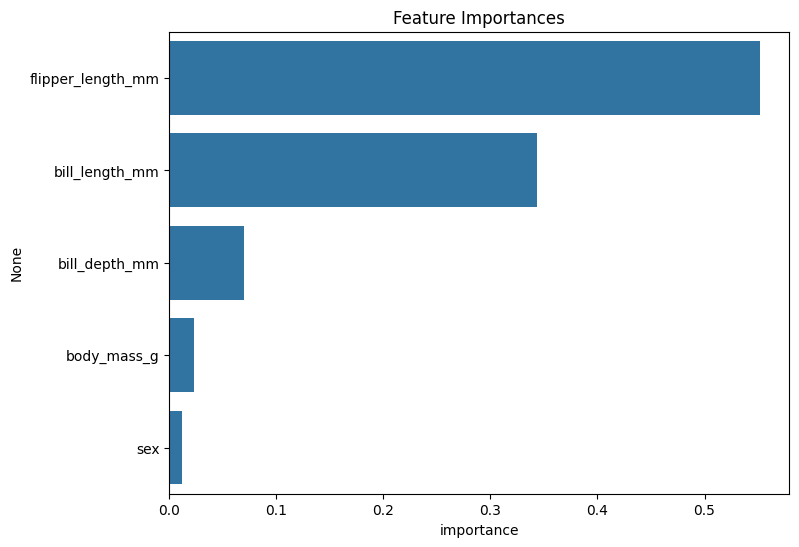

In [5]:
# Get feature importances
importances = tree.feature_importances_

# Convert to DataFrame for convenience
importances_df = pd.DataFrame(data=importances, index=X.columns, columns=['importance'])
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y=importances_df.index, data=importances_df)
plt.title('Feature Importances')
plt.show()

Nous avons calculé l'importance des variables dans le modèle de classification. L'importance des variables est une mesure de l'importance relative de chaque variable dans la prédiction de l'espèce des manchots. Les variables avec une importance plus élevée ont un impact plus important sur la prédiction.

Sur le graphique, nous pouvons voir que la longueur de l'aileron (flipper_length_mm) est la variable la plus importante dans la prédiction de l'espèce des manchots, suivie de la profondeur du bec (bill_depth_mm), de la longueur du bec (bill_length_mm) et de la masse corporelle (body_mass_g). Le sexe du manchot (sex) est la variable la moins importante.

Cela conclut notre analyse des données des manchots. Nous avons effectué une analyse en composantes principales, une analyse de variance, une prédiction de l'espèce à l'aide d'un arbre de décision et une analyse de l'importance des variables dans le modèle de classification.